![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

# **_Análisis de Segmentación de Pisos mediante Clustering🏡_**

## **_Introducción_**
En este notebook, realizaremos un análisis de clustering para segmentar los pisos en función de sus características y la influencia de su entorno. El objetivo es identificar patrones en el mercado inmobiliario y agrupar propiedades con similitudes en términos de ubicación, tipo de negocios cercanos, acceso a transporte y otras variables relevantes.


## **_Objetivos del análisis_**

Segmentación del mercado inmobiliario: Identificar grupos de pisos con precios y características similares.
Evaluar la influencia del entorno: Analizar cómo la cercanía a diferentes tipos de negocios, transporte público y otros factores afectan los precios de los inmuebles.
Detección de zonas con potencial de valorización: Identificar áreas en crecimiento o con características similares a zonas más caras.
Optimización de estrategias de inversión: Proporcionar información para la toma de decisiones en compra, venta o inversión en bienes raíces.


## **_Metodología_**

##### **_1. Carga y exploración de datos:_**

Revisión de los datos disponibles .
Identificación, tratamiento de valores nulos o inconsistencias, entre otras acciones.

##### **_2. Preprocesamiento de datos:_**

Codificación de variables categóricas como barrio y otras en relacion a negocios y la vivienda .
Normalización de variables numéricas (precios, distancias, etc.).

-------------------------------------------------------------------------------------------------------------------
**_Los primeros dos pasos fueron realizados en el notebook donde esta el registro del EDA_** 

-------------------------------------------------------------------------------------------------------------------


##### **_3. Selección de variables:_**

Elección de las características más relevantes para el análisis.
Análisis de correlación entre características y precio.

##### **_4. Aplicación de Clustering:_**

Prueba de diferentes algoritmos de clustering (K-Means, DBSCAN, GMM, etc.).
Selección del número óptimo de clusters (método del codo, silhouette score, etc.).
Evaluación de los resultados y ajuste de parámetros si es necesario.

##### **_5. Análisis e interpretación de clusters:_**

Visualización de los clusters(posiblemente un mapa).
Comparación de los precios y características dentro de cada cluster.
Evaluación del impacto de los negocios, el transporte, entre otras variables en los precios.

##### **_6. Aplicación de clustering en modelos predictivos:_**

Uso de los clusters como una nueva variable en modelos de regresión para mejorar la predicción de precios.
Evaluación del impacto de cada cluster en el precio de los pisos.

**_Conclusión esperada_**

Este análisis proporcionará una segmentación detallada del mercado inmobiliario, ayudando a identificar zonas con potencial de inversión y a entender mejor los factores que influyen en los precios de los inmuebles. Además, permitirá mejorar modelos de predicción de precios al incluir la influencia del entorno en los resultados.



# **_Importacion librerias_**

In [75]:
import pandas as pd 
import numpy as np

# visuzalizaciones
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots


# **_Lectura de datos_**

In [76]:
df_clustering = pd.read_csv("./data/dfbaseline.csv")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8292\2563219108.py:1: DtypeWarning: Columns (140) have mixed types. Specify dtype option on import or set low_memory=False.
  df_clustering = pd.read_csv("./data/dfbaseline.csv")


# **_Ajustes extras_**

In [77]:
pd.set_option("display.max_columns", None)
# pd.reset_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
# pd.reset_option("display.max_rows", None)

# **_Modelado Clustering_**

### **_Seleccion de variables_**



In [78]:
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Columns: 143 entries, Unnamed: 0 to total_estaciones
dtypes: float64(26), int64(99), object(18)
memory usage: 10.9+ MB


In [79]:
df_clustering.head(10)

,Unnamed: 0,url,m2_constr,distrito,cod_distrito,barrio,cod_barrio,letra_ce,amueblado,planta,dormitorios,banos,balcon,terraza,trastero,ascensor,tipo_inmueble,tiene_armario,cancha_tenis,chimenea,exterior,interior,porton_electrico,videoportero,precio,web,armarios,codigo_postal,m2_utiles,tipo_suelo,certificado_energetico,puerta_seguridad,gastos_comunidad,tipo_fachada,agua_caliente,portero,orientacion_este,orientacion_oeste,orientacion_sur,clasificacion_aire,orientacion_norte,letra_emisiones,tipo_calefaccion,energia_calefaccion,num_personas,num_personas_hombres,num_personas_mujeres,total_transacciones,viv_nuevas_transacciones,viv_usadas_transacciones,lineas_metro,num_lineas_buses,renta_neta_media_por_persona,renta_neta_media_por_hogar,mediana_de_la_renta_por_unidad_de_consumo,renta_bruta_media_por_persona,renta_bruta_media_por_hogar,habitantes,hogares,tamaño_medio_del_hogar,tamaño_del_hogar_(nº_de_personas_en_la_vivienda),hog_con_1,hog_con_2,hog_con_3,hog_con_4,hog_con_5,hog_con_6,hog_con_7,hog_con_8,hog_con_9,hog_con_10,hog_con_11,hog_con_12,hog_con_13,hog_con_14,hog_con_15_y_más,comercio_serviciosminoristas,hosteleria_restauracion,salud_bienestar_educacion,servicios_profesionales,cultura_entretenimiento,m2_areasverdes,estado_agr,cocina_sin_informacion,cocina_reformada,cocina_sin_reformar,cocina_amueblada,cocina_sin_amueblar,cocina_equipada,cocina_independiente,cocina_abierta,jardin_n,piscina_n,ascensor_es_imputado,balcon_es_imputado,terraza_es_imputado,trastero_es_imputado,chimenea_es_imputado,tiene_jardin_es_imputado,tiene_piscina_es_imputado,cancha_tenis_es_imputado,tiene_armario_es_imputado,porton_electrico_es_imputado,videoportero_es_imputado,puerta_seguridad_es_imputado,num_lineas_buses_es_imputado,estaciones_cercanias_es_imputado,estaciones_metroligero_es_imputado,porc,eficiencia_carpinteria,tipologia_agr_Atico,tipologia_agr_Casa,tipologia_agr_Chalet,tipologia_agr_Duplex,tipologia_agr_Estudio,tipologia_agr_Piso,estado_A Estrenar,estado_A Reformar,estado_Buen Estado,estado_Buen estado,estado_Bueno / Habitable,estado_Depende Del Precio,estado_Desconocido,estado_En Buen Estado,estado_Nuevo / En Construcción,estado_Obra Nueva,estado_Obra nueva,estado_Para Reformar,estado_Perfecto Estado,estado_Reformado,estado_perfecto estado,estado_reformado,estado_Óptimo / Reformado,antiguedad_Desconocido,antiguedad_Entre 10 y 30 años,antiguedad_Entre 30 y 50 años,antiguedad_Entre 5 y 10 años,antiguedad_Menos de 5 años,antiguedad_Más de 50 años,num_garajes,tipo_garaje,habitaciones,total_estaciones
0,0,https://www.indomio.es/anuncios/75404850/,100.0,Salamanca,4,Recoletos,41,2.0,0.1,1.0,1,1,1,1,1,1,lujo,1,1,0,1,0,0,1,2000000,Indomio.com,0,28001.0,80.0,Desconocido,1,1,100,Desconocido,Desconocido,0.5,0,0,0,Desconocido,0,F,Central,No clasificado en energía,15.444,6.966,8.478,243.0,8.0,235,6,0,28.140,64.925,31.15,38.751,89.407,145.702,63.877,"2,28",24.741,17.692,9.580,6.897,3.027,1.133,430.0,173,98,38,11,10,8,9,30,30,2470,1051,928,2315,917,"333526,92",Para reformar,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,NaN,2,205
1,2,https://www.indomio.es/anuncios/82164729/,74.0,Chamartín,5,Hispanoamérica,54,Desconocido,0.0,7.0,1,1,0,0,0,1,lujo,1,0,0,0,0,0,0,650000,Indomio.com,0,28016.0,59.2,Desconocido,0,0,NaN,Desconocido,Desconocido,0.0,0,0,0,Desconocido,0,Desconocido,No clasif,No clasificado en energía,31.470,14.159,17.311,311.0,12.0,299,7,0,30.506,74.842,34.65,42.678,104.706,144.796,59.133,"2,45",20.435,16.135,9.450,7.148,3.507,1.406,536.0,234,113,56,32,13,14,9,45,45,693,274,228,505,220,"214208,79",NaN,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,NaN,2,296
2,3,https://www.indomio.es/anuncios/82164739/,76.0,Chamartín,5,Hispanoamérica,54,3.0,0.0,6.0,1,1,0,0,0,1,lujo,1,0,0,0,0,0,0,650000,Indomio.com,0,28016.0,60.8,Desconocido,1,0,NaN,Desconocido,Desconocido,0.0,0,0,0,Desconocido,0,E,No clasif,No clasificado en energía

In [80]:
df_clustering.describe()

,Unnamed: 0,m2_constr,cod_distrito,cod_barrio,amueblado,planta,dormitorios,banos,balcon,terraza,trastero,ascensor,tiene_armario,cancha_tenis,chimenea,exterior,interior,porton_electrico,videoportero,precio,armarios,codigo_postal,m2_utiles,certificado_energetico,puerta_seguridad,portero,orientacion_este,orientacion_oeste,orientacion_sur,orientacion_norte,num_personas,num_personas_hombres,num_personas_mujeres,total_transacciones,viv_nuevas_transacciones,viv_usadas_transacciones,lineas_metro,num_lineas_buses,renta_neta_media_por_persona,renta_neta_media_por_hogar,mediana_de_la_renta_por_unidad_de_consumo,renta_bruta_media_por_persona,renta_bruta_media_por_hogar,habitantes,hogares,tamaño_del_hogar_(nº_de_personas_en_la_vivienda),hog_con_1,hog_con_2,hog_con_3,hog_con_4,hog_con_5,hog_con_6,hog_con_7,hog_con_8,hog_con_9,hog_con_10,hog_con_11,hog_con_12,hog_con_13,hog_con_14,hog_con_15_y_más,comercio_serviciosminoristas,hosteleria_restauracion,salud_bienestar_educacion,servicios_profesionales,cultura_entretenimiento,cocina_sin_informacion,cocina_reformada,cocina_sin_reformar,cocina_amueblada,cocina_sin_amueblar,cocina_equipada,cocina_independiente,cocina_abierta,jardin_n,piscina_n,ascensor_es_imputado,balcon_es_imputado,terraza_es_imputado,trastero_es_imputado,chimenea_es_imputado,tiene_jardin_es_imputado,tiene_piscina_es_imputado,cancha_tenis_es_imputado,tiene_armario_es_imputado,porton_electrico_es_imputado,videoportero_es_imputado,puerta_seguridad_es_imputado,num_lineas_buses_es_imputado,estaciones_cercanias_es_imputado,estaciones_metroligero_es_imputado,porc,eficiencia_carpinteria,tipologia_agr_Atico,tipologia_agr_Casa,tipologia_agr_Chalet,tipologia_agr_Duplex,tipologia_agr_Estudio,tipologia_agr_Piso,estado_A Estrenar,estado_A Reformar,estado_Buen Estado,estado_Buen estado,estado_Bueno / Habitable,estado_Depende Del Precio,estado_Desconocido,estado_En Buen Estado,estado_Nuevo / En Construcción,estado_Obra Nueva,estado_Obra nueva,estado_Para Reformar,estado_Perfecto Estado,estado_Reformado,estado_perfecto estado,estado_reformado,estado_Óptimo / Reformado,antiguedad_Desconocido,antiguedad_Entre 10 y 30 años,antiguedad_Entre 30 y 50 años,antiguedad_Entre 5 y 10 años,antiguedad_Menos de 5 años,antiguedad_Más de 50 años,num_garajes,habitaciones,total_estaciones
count,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.0,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,1.000800e+04,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.0,10008.0,10008.0,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000,10008.000000
mean,5015.776179,138.600105,7.770683,81.399181,0.099480,1.540468,2.806455,2.062650,0.082534,0.189

In [81]:
# Identificar columnas numéricas y categóricas
num_cols = df_clustering.select_dtypes(include=["number"]).columns
cat_cols = df_clustering.select_dtypes(exclude=["number"]).columns

print("Columnas numéricas:", num_cols)
print("Columnas categóricas:", cat_cols)

Columnas numéricas: Index(['Unnamed: 0', 'm2_constr', 'cod_distrito', 'cod_barrio', 'amueblado',
       'planta', 'dormitorios', 'banos', 'balcon', 'terraza',
       ...
       'estado_Óptimo / Reformado', 'antiguedad_Desconocido',
       'antiguedad_Entre 10 y 30 años', 'antiguedad_Entre 30 y 50 años',
       'antiguedad_Entre 5 y 10 años', 'antiguedad_Menos de 5 años',
       'antiguedad_Más de 50 años', 'num_garajes', 'habitaciones',
       'total_estaciones'],
      dtype='object', length=125)
Columnas categóricas: Index(['url', 'distrito', 'barrio', 'letra_ce', 'tipo_inmueble', 'web',
       'tipo_suelo', 'gastos_comunidad', 'tipo_fachada', 'agua_caliente',
       'clasificacion_aire', 'letra_emisiones', 'tipo_calefaccion',
       'energia_calefaccion', 'tamaño_medio_del_hogar', 'm2_areasverdes',
       'estado_agr', 'tipo_garaje'],
      dtype='object')


### **_Correlacion variables numericas y precio_**

precio                                              1.000000
banos                                               0.703490
m2_utiles                                           0.673958
m2_constr                                           0.671352
habitaciones                                        0.626697
renta_bruta_media_por_persona                       0.445563
renta_neta_media_por_persona                        0.444392
dormitorios                                         0.444029
renta_bruta_media_por_hogar                         0.420846
mediana_de_la_renta_por_unidad_de_consumo           0.416840
renta_neta_media_por_hogar                          0.413101
servicios_profesionales                             0.299570
salud_bienestar_educacion                           0.296386
lineas_metro                                        0.289398
comercio_serviciosminoristas                        0.260288
cultura_entretenimiento                             0.243076
hosteleria_restauracion 

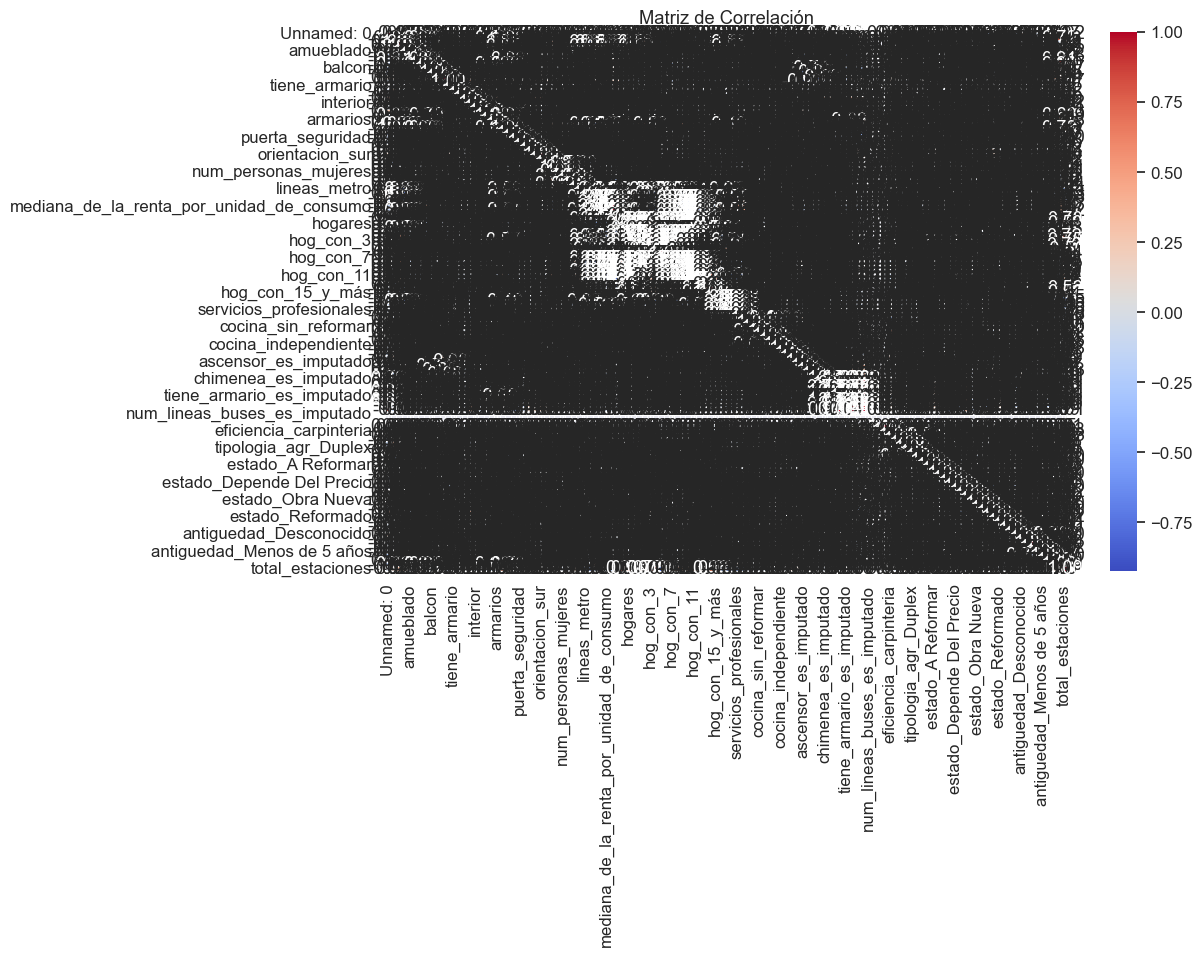

In [82]:
# Calcular la correlación entre el precio y las demás variables numéricas
correlation_matrix = df_clustering[num_cols].corr()

# Mostrar la correlación del precio con otras variables
print(correlation_matrix["precio"].sort_values(ascending=False))

# Crear un mapa de calor para visualizar las correlaciones

plt.figure(figsize=(11, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

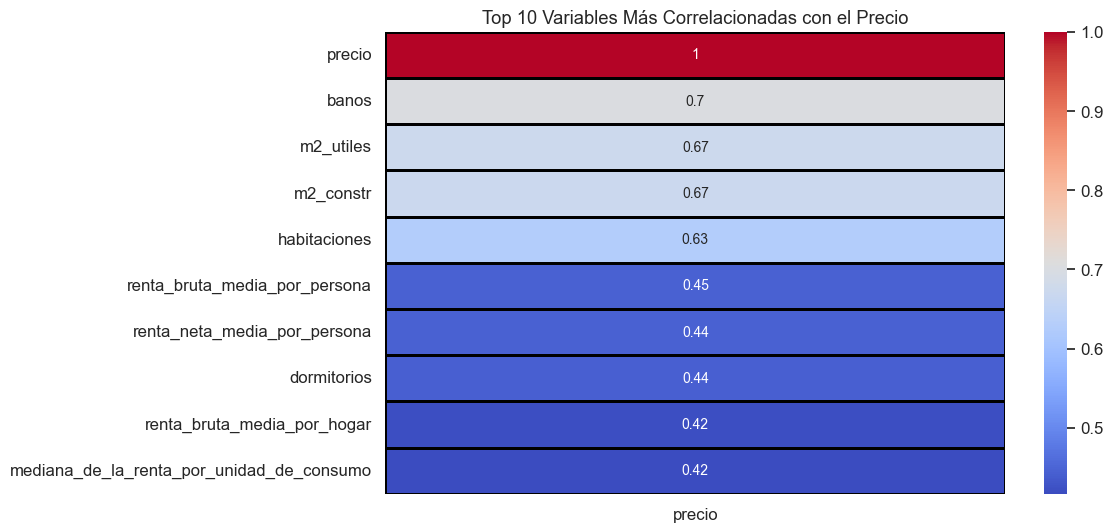

In [83]:
# Seleccionar las 10 variables más correlacionadas con el precio
top_corr = correlation_matrix["precio"].abs().sort_values(ascending=False).head(10)

# Filtrar solo estas variables para el heatmap
top_corr_features = correlation_matrix.loc[top_corr.index, top_corr.index]

# Graficar un mapa de calor solo con las más correlacionadas
sns.set(font_scale=1.1)
plt.figure(figsize=(10, 6))
sns.heatmap(top_corr.to_frame(), annot=True, cmap="coolwarm", linewidths=1, linecolor='black', annot_kws={"size": 10})
plt.title("Top 10 Variables Más Correlacionadas con el Precio")
plt.show()

### **_Correlacion variables categoricas y precio_**

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8292\3908783436.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clustering, x="distrito", y="precio", palette="coolwarm")


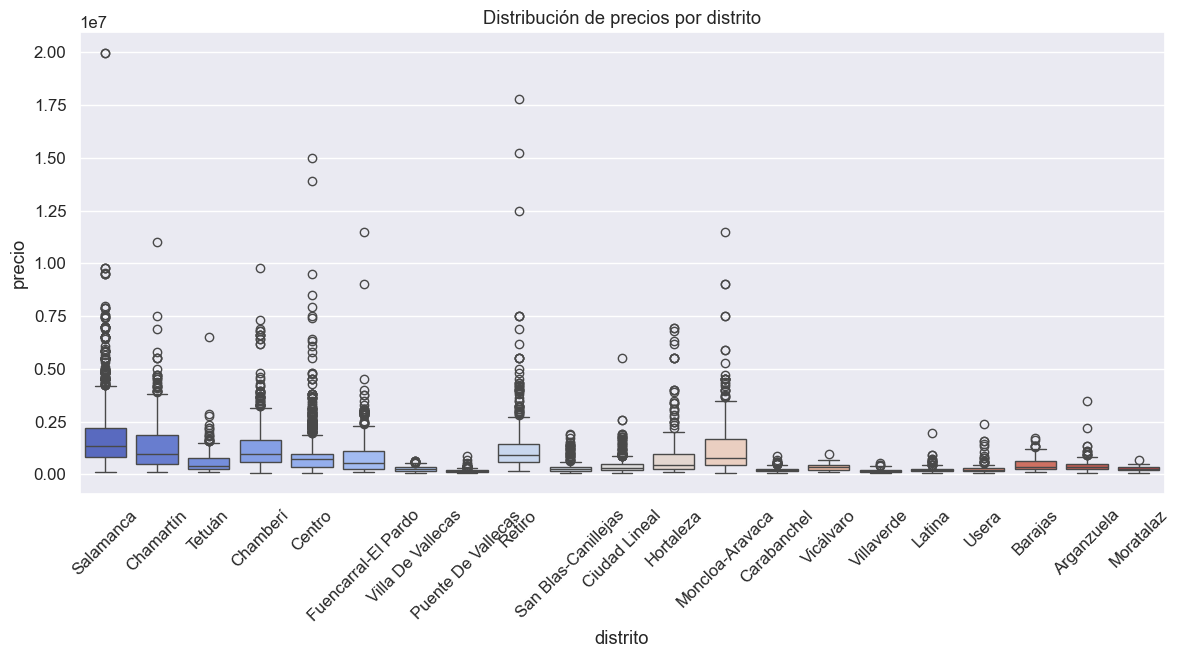

In [98]:
# Visualizacion de distribucion de precios por distrito
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_clustering, x="distrito", y="precio", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Distribución de precios por distrito")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8292\2720038316.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clustering, x=col, y='precio', palette="coolwarm")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8292\2720038316.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clustering, x=col, y='precio', palette="coolwarm")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8292\2720038316.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clustering, x=col, y='precio', palette="coolwarm")
C:\Users\Lenovo\AppData\Loca

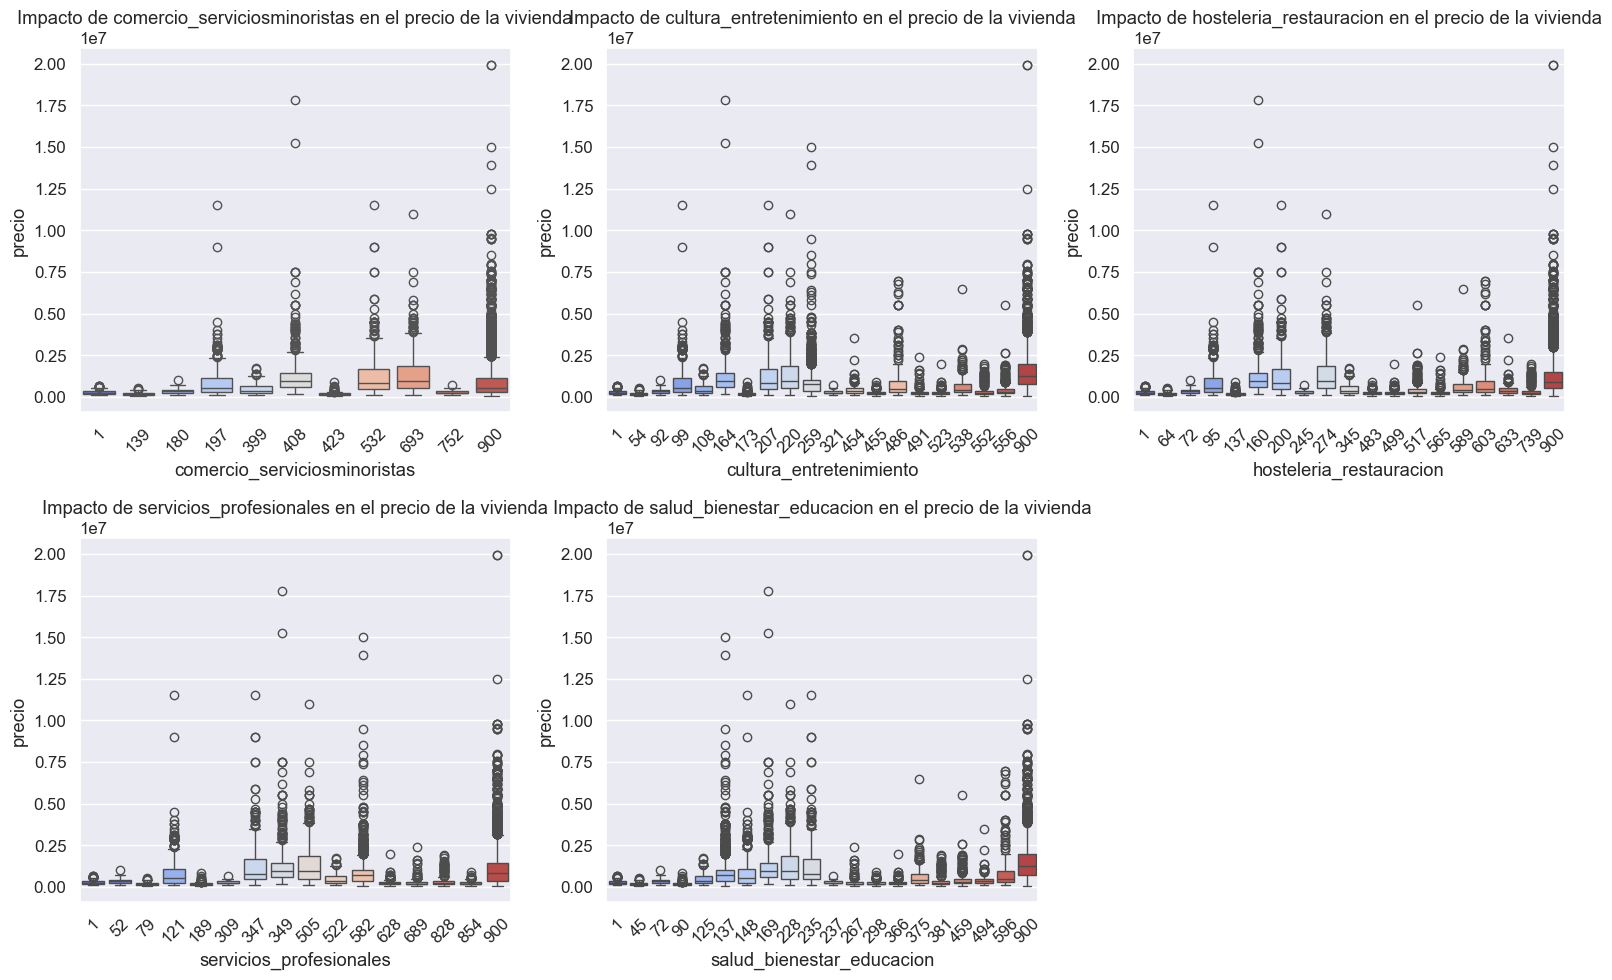

In [95]:
# Selección de las columnas de tipos de negocio
cols_negocios = ['comercio_serviciosminoristas', 'cultura_entretenimiento', 'hosteleria_restauracion', 
                 'servicios_profesionales', 'salud_bienestar_educacion']

# Limitar los valores de las columnas de negocios entre 1 y 900
for col in cols_negocios:
    df_clustering[col] = df_clustering[col].clip(1, 900)

# Crear una figura con subgráficas para cada tipo de negocio
plt.figure(figsize=(16, 10))

for i, col in enumerate(cols_negocios, 1):
    plt.subplot(2, 3, i)  # Distribuir en una cuadrícula de 2 filas y 3 columnas
    sns.boxplot(data=df_clustering, x=col, y='precio', palette="coolwarm")
    plt.title(f'Impacto de {col} en el precio de la vivienda')
    plt.xticks(rotation=45)

# Ajustar el espacio entre subgráficas
plt.tight_layout()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8292\1167709478.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clustering, x=col, y='precio', palette="coolwarm")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8292\1167709478.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clustering, x=col, y='precio', palette="coolwarm")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8292\1167709478.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clustering, x=col, y='precio', palette="coolwarm")
C:\Users\Lenovo\AppData\Loca

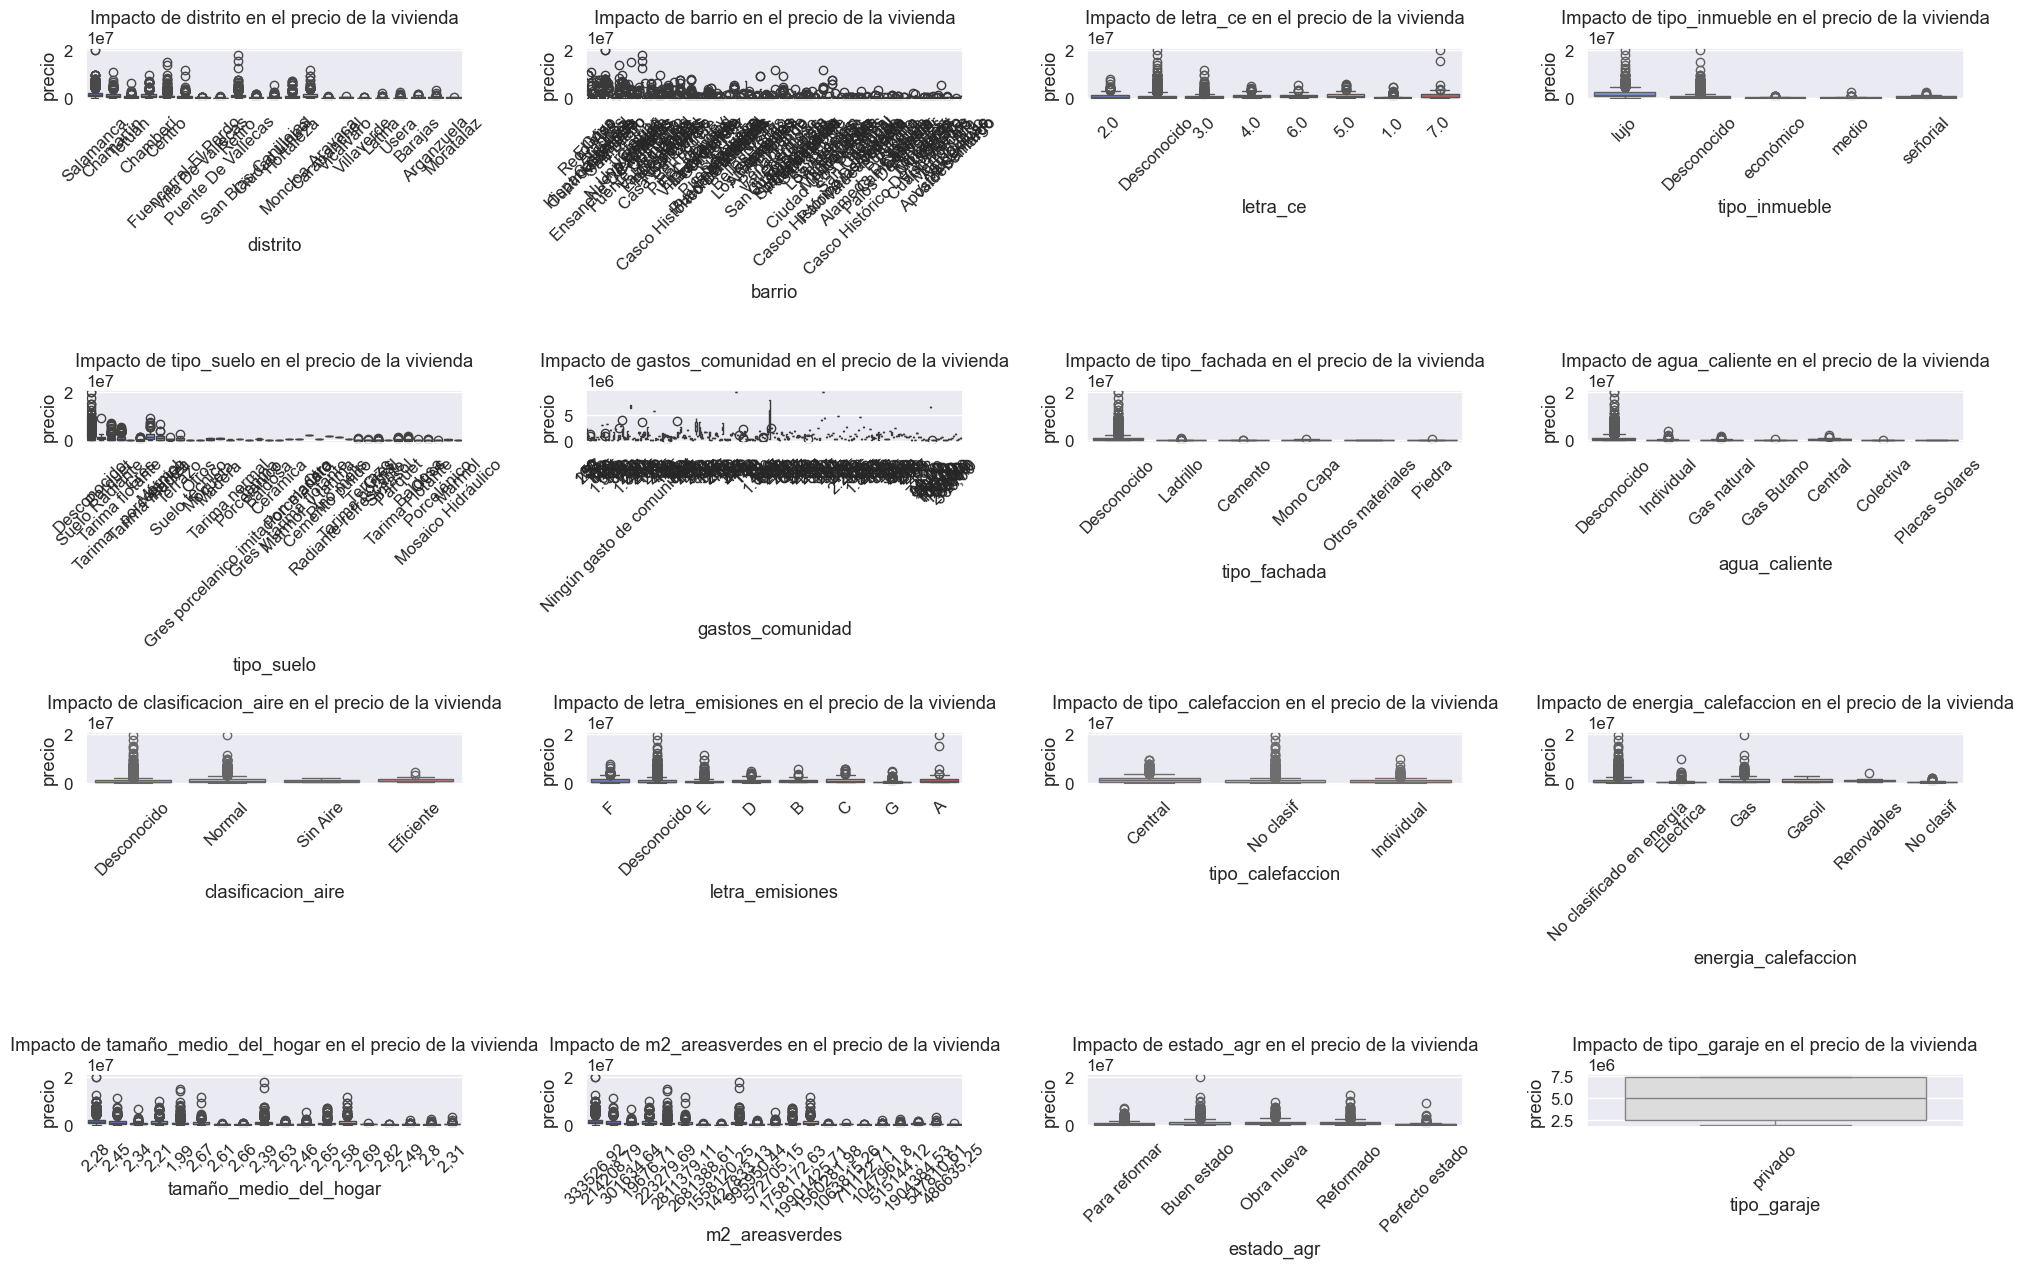

In [100]:
# Lista de las variables categóricas
categorical_columns = ['distrito', 'barrio', 'letra_ce', 'tipo_inmueble',
                       'tipo_suelo', 'gastos_comunidad', 'tipo_fachada', 'agua_caliente',
                       'clasificacion_aire', 'letra_emisiones', 'tipo_calefaccion',
                       'energia_calefaccion', 'tamaño_medio_del_hogar', 'm2_areasverdes',
                       'estado_agr', 'tipo_garaje']

# Crear una figura con subgráficas para cada variable categórica
plt.figure(figsize=(20, 15))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(5, 4, i)  # Distribuir en una cuadrícula de 5 filas y 4 columnas
    sns.boxplot(data=df_clustering, x=col, y='precio', palette="coolwarm")
    plt.title(f'Impacto de {col} en el precio de la vivienda')
    plt.xticks(rotation=45)

# Ajustar el espacio entre subgráficas
plt.tight_layout()
plt.show()

### **_Aplicacion de Clustering_**

### **_Analisis e interpretacion de clusters_**

Aplicacion de 

# **_Conclusiones finales_**

Despues de la creacion de los anteriores modelos se llega a la conclusion que el mejor modelo es XXXX con un resultado de XXXX y que gracias a el mismo podemos entender que sucede lo siguiente....